In [9]:
import numpy as np
import pandas as pd
from matplotlib import rcParams
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
import seaborn as sns
import graphviz 

In [10]:

# switch to seaborn default stylistic parameters
sns.set()
# larger plot fonts
sns.set_context('talk')
# change default plot size
rcParams['figure.figsize'] = 10,8

In [11]:

# read the cpu data
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/machine.csv")
df.index = df['vendor']+' '+df['model']
df.drop(['vendor', 'model'], axis=1, inplace=True)
df['cs'] = np.round(1e3/df['myct'], 2)    # clock speed in MHz

In [12]:

# get ready for Scikit-Learn
predictors = ['cach', 'cs', 'mmin']      # choose predictors as you like
target = 'prp'
X = df[predictors].values
y = df[target].values

In [13]:

# test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [14]:

# train the model
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=2)

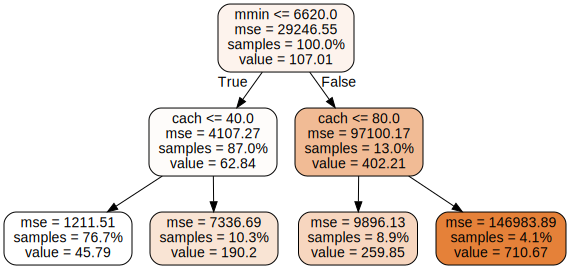

In [15]:
# view the tree
dot_data = export_graphviz(reg, precision=2,
                     feature_names=predictors,  
                     proportion=True,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)  
graph


In [16]:
# make predictions and compute error
y_predict = reg.predict(X_test)
errors = y_test - y_predict
rmse = np.sqrt((errors**2).mean())
print('rmse: {:0.2f}'.format(rmse))


rmse: 85.22
